In [ ]:
from __future__ import print_function
import keras
import numpy as np
from PIL import Image
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from utils.custom_generator import custom_image_generator
from utils.image import ImageDataGenerator
from matplotlib.pyplot import imshow

/Users/base/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Using TensorFlow backend.


In [2]:
# input image dimensions
img_rows, img_cols = 28, 28

# load the data and split to training and validation sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [3]:
num_classes = 10
# MNIST model in Keras using sequential model building
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# compile the network with categorical crossentropy objective function and Adam optimizer. 
# other optimizers include Adam, Adadelta, etc 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001),
              metrics=['accuracy'])


In [4]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [5]:
train_batch_size = 128
val_batch_size = 128

# convert class vectors to binary class matrices
print (y_train.shape)
print (y_test.shape)
print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[0])

(60000,)
(10000,)
5
(60000, 10)
(10000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [6]:
# create training and validation generators
train_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_train, y_train,
    seed=1,  # Use a specific random seed
    batch_size=train_batch_size,  # Use batch size of 128
    )

validation_generator =  custom_image_generator(
    ImageDataGenerator(rescale=1./255),
    x_test, y_test,
    seed=1,  # Use a specific random seed
    batch_size=val_batch_size,  #Use batch size of 128
    )

In [7]:
epochs = 12

# train the network for the number of epochs defined
model.fit_generator(
    generator=train_generator,
    steps_per_epoch=x_train.shape[0] // train_batch_size,
    validation_data = validation_generator,
    validation_steps=x_test.shape[0] // val_batch_size,
    epochs=epochs
    )


Epoch 1/12


  1/468 [..............................] - ETA: 8:06 - loss: 2.3050 - acc: 0.1406

  2/468 [..............................] - ETA: 5:38 - loss: 2.2917 - acc: 0.1484

  3/468 [..............................] - ETA: 4:43 - loss: 2.2318 - acc: 0.1875

  4/468 [..............................] - ETA: 4:14 - loss: 2.1835 - acc: 0.2324

  5/468 [..............................] - ETA: 3:57 - loss: 2.1158 - acc: 0.2828

  6/468 [..............................] - ETA: 3:44 - loss: 2.0630 - acc: 0.3034

  7/468 [..............................] - ETA: 3:36 - loss: 2.0125 - acc: 0.3337

  8/468 [..............................] - ETA: 3:32 - loss: 1.9438 - acc: 0.3691

  9/468 [..............................] - ETA: 3:30 - loss: 1.8668 - acc: 0.4062

 10/468 [..............................] - ETA: 3:25 - loss: 1.7978 - acc: 0.4281

 11/468 [..............................] - ETA: 3:24 - loss: 1.7352 - acc: 0.4482

 12/468 [..............................] - ETA: 3:21 - loss: 1.6771 - acc: 0.4648

KeyboardInterrupt: 

In [27]:
model.save('./models/mnist_model.h5')

In [8]:
# load pre-trained model
model = load_model('./models/mnist_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

img_height 225
img_width 225
(1, 28, 28, 1)


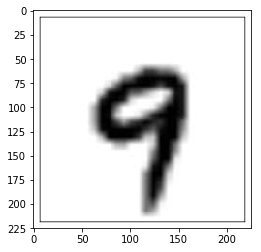

In [13]:
# load image
img = Image.open('images/mnist_img_1.jpeg')
imshow(img)
print ('img_height', img.size[0])
print ('img_width', img.size[1])
# convert to grayscale and reshape the array to the network input size
resized_img = img.resize((img_cols, img_rows))
resized_img = resized_img.convert('L')
resized_img = np.asarray(resized_img, dtype=np.float32)
resized_img/=255
resized_img = np.reshape(resized_img, (1, img_rows, img_cols, 1))
print(resized_img.shape)

In [14]:
# predict number based on the network output
out = model.predict(resized_img)
print ("Softmax values:", out)
print("This number is", out.argmax())

Softmax values: [[2.4731955e-03 3.8461279e-04 4.3981420e-03 3.4203943e-02 7.7909797e-05
  6.4093978e-03 2.6387088e-05 3.7044901e-03 3.7800160e-04 9.4794393e-01]]
This number is 9
